# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')

df = df.drop(columns=['pageviews'])

In [3]:
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
data = df[['num_commits', 'AVG(diff)']]

kmeans = KMeans(n_clusters=3, random_state=21)
data['cluster'] = kmeans.fit_predict(data)

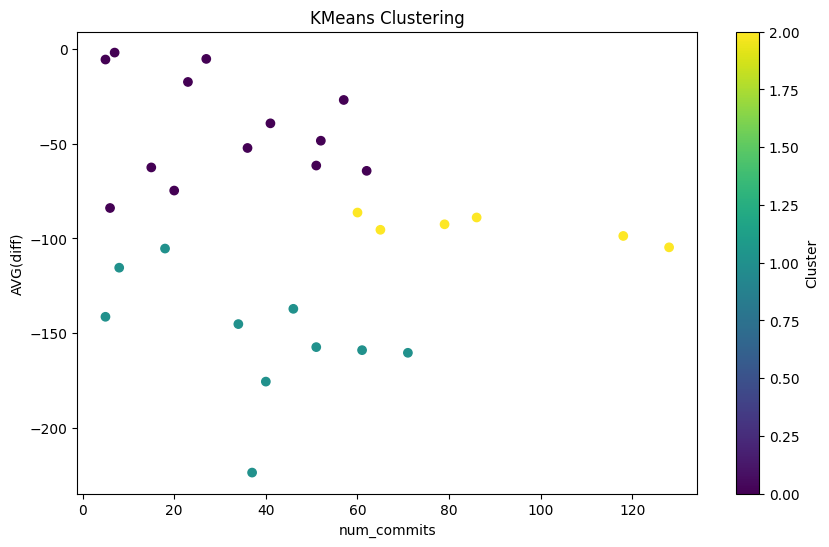

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.colorbar(label='Cluster')
plt.show()

In [6]:
silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
print(f'Silhouette score: {silhouette_avg}')

Silhouette score: 0.4454402135233297


Silhouette Score for n_clusters=4: 0.41503879936268956
Silhouette Score for n_clusters=5: 0.3521030626149593


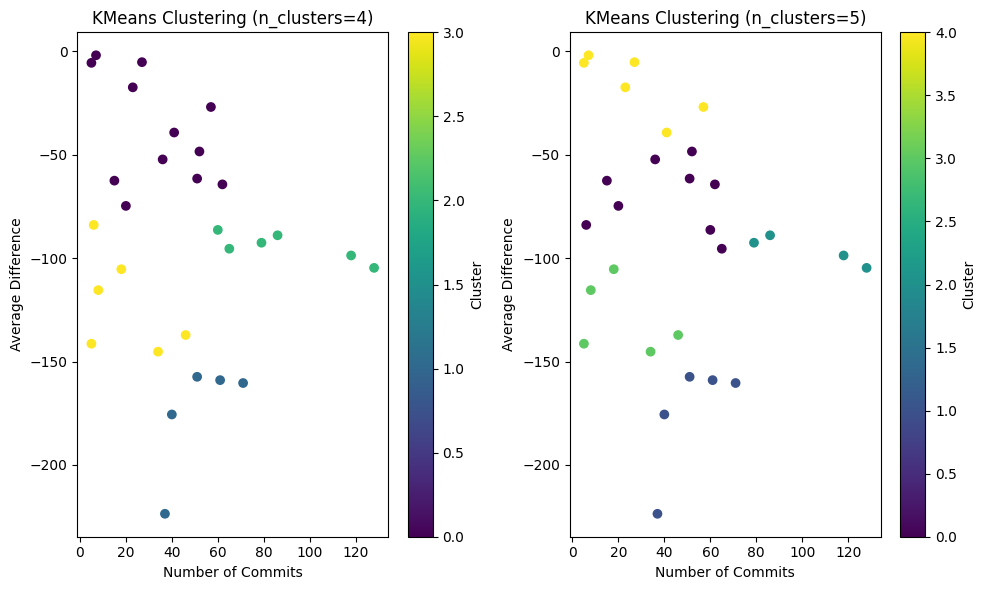

Silhouette Score for n_clusters=6: 0.3954350435152892
Silhouette Score for n_clusters=7: 0.39637476619843964


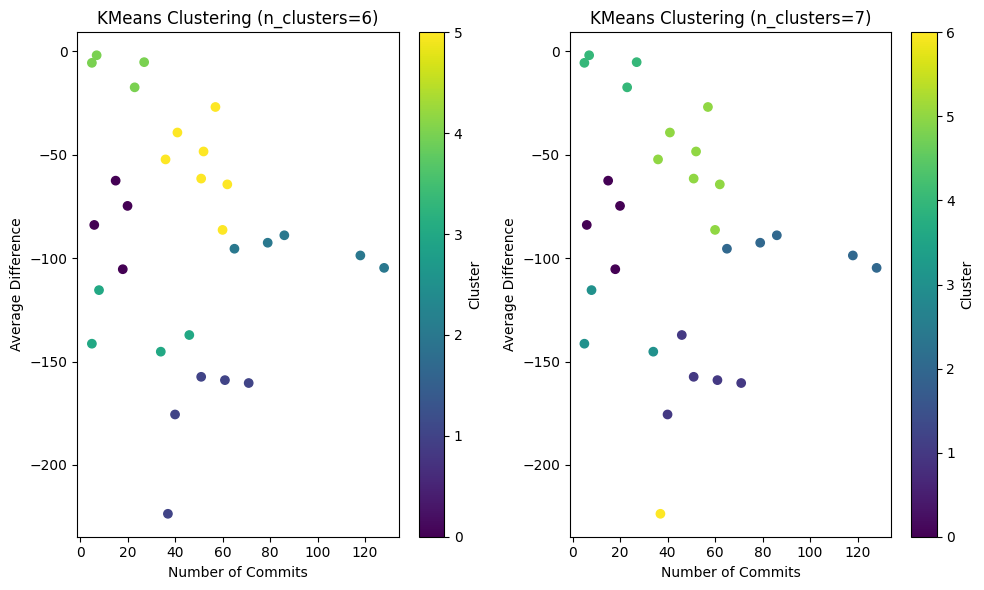

Silhouette Score for n_clusters=8: 0.48638087320227846
Silhouette Score for n_clusters=9: 0.45376670441174133


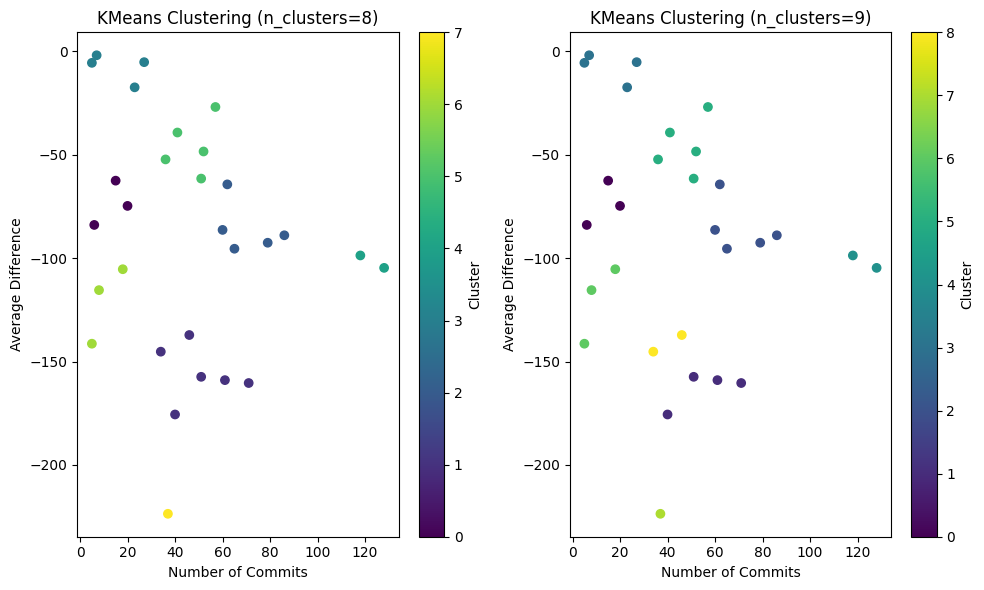

In [7]:
for n in range(4, 10, 2):
    kmeans = KMeans(n_clusters=n, random_state=21)
    data['cluster'] = kmeans.fit_predict(data)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
    plt.title(f'KMeans Clustering (n_clusters={n})')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')

    silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
    print(f'Silhouette Score for n_clusters={n}: {silhouette_avg}')

    kmeans = KMeans(n_clusters=n+1, random_state=21)
    data['cluster'] = kmeans.fit_predict(data)

    plt.subplot(1, 2, 2)
    plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
    plt.title(f'KMeans Clustering (n_clusters={n+1})')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')
    silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
    print(f'Silhouette Score for n_clusters={n+1}: {silhouette_avg}')
    
    plt.tight_layout()
    plt.show()
    

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [8]:
dbscan = DBSCAN(eps=20, min_samples=2)
data['cluster'] = dbscan.fit_predict(data)

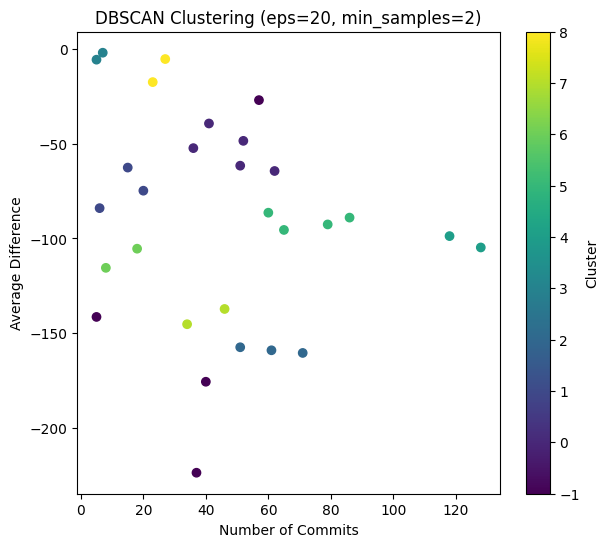

Silhouette Score for eps=20, min_samples=2: 0.38339641455696616


In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering (eps=20, min_samples=2)')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.colorbar(label='Cluster')
plt.show()

silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
print(f'Silhouette Score for eps=20, min_samples=2: {silhouette_avg}')

Silhouette Score for eps=20, min_samples=2: 0.38339641455696616
Silhouette Score for eps=20, min_samples=3: 0.046677004430482796
Silhouette Score for eps=20, min_samples=4: -0.027327812753917446
Silhouette Score for eps=21, min_samples=2: 0.4646046547648843
Silhouette Score for eps=21, min_samples=3: 0.3244154376216247
Silhouette Score for eps=21, min_samples=4: 0.09625090910636881
Silhouette Score for eps=22, min_samples=2: 0.4794129092034348
Silhouette Score for eps=22, min_samples=3: 0.35962377151588787
Silhouette Score for eps=22, min_samples=4: 0.14561751812653242
Silhouette Score for eps=23, min_samples=2: 0.3875440298477327
Silhouette Score for eps=23, min_samples=3: 0.3080158398811546
Silhouette Score for eps=23, min_samples=4: 0.29721983502190064


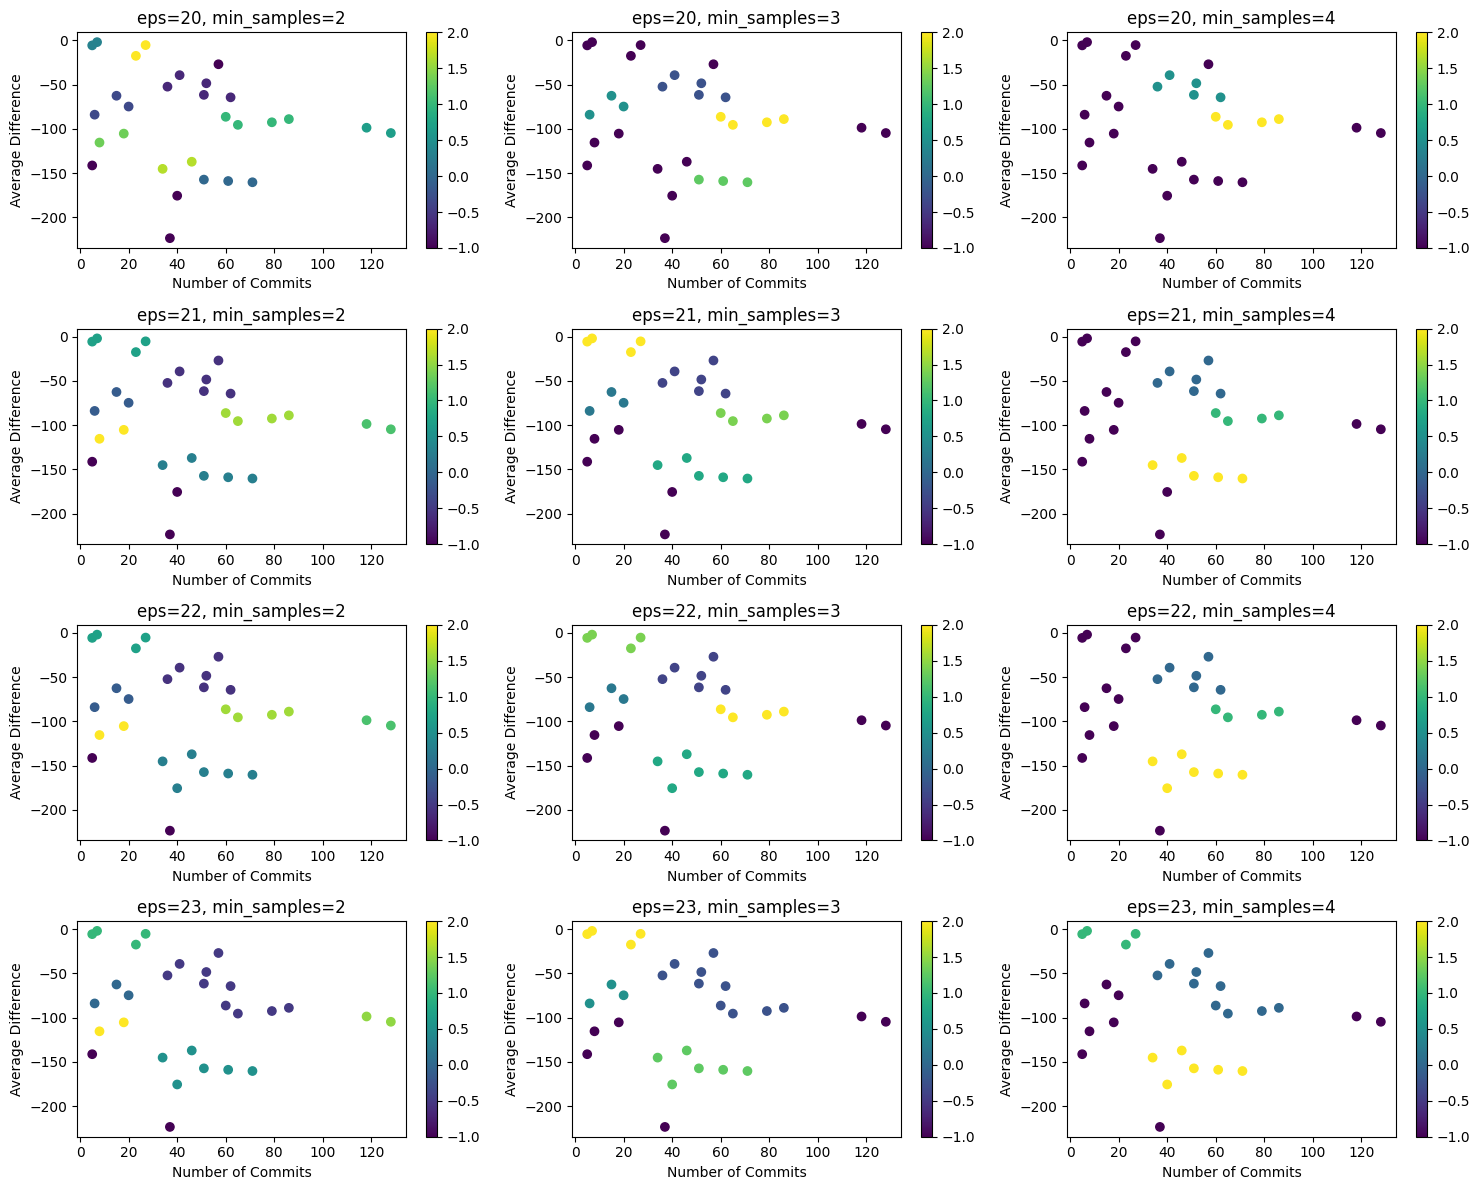

In [10]:
eps_values = [ 20, 21, 22, 23]
min_samples_values = [2, 3, 4]

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['cluster'] = dbscan.fit_predict(data)

        scatter = axs[i, j].scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Number of Commits')
        axs[i, j].set_ylabel('Average Difference')

        silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
        print(f'Silhouette Score for eps={eps}, min_samples={min_samples}: {silhouette_avg}')

for ax in axs.flat:
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [11]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
data['cluster'] = agg_clustering.fit_predict(data)

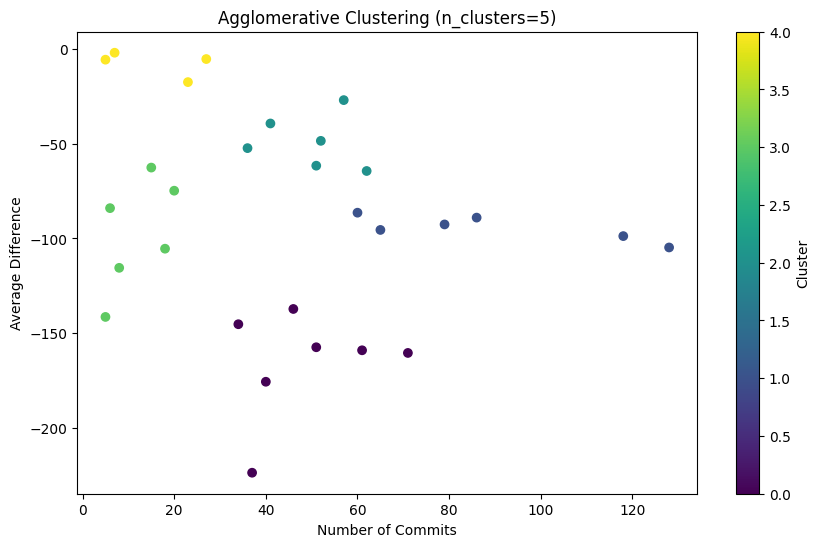

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
plt.title(f'Agglomerative Clustering (n_clusters=5)')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
print(f'Silhouette Score for n_clusters=5: {silhouette_avg}')

Silhouette Score for n_clusters=5: 0.46383015199381467


Silhouette Score for n_clusters=4: 0.4448362750283643
Silhouette Score for n_clusters=5: 0.46383015199381467


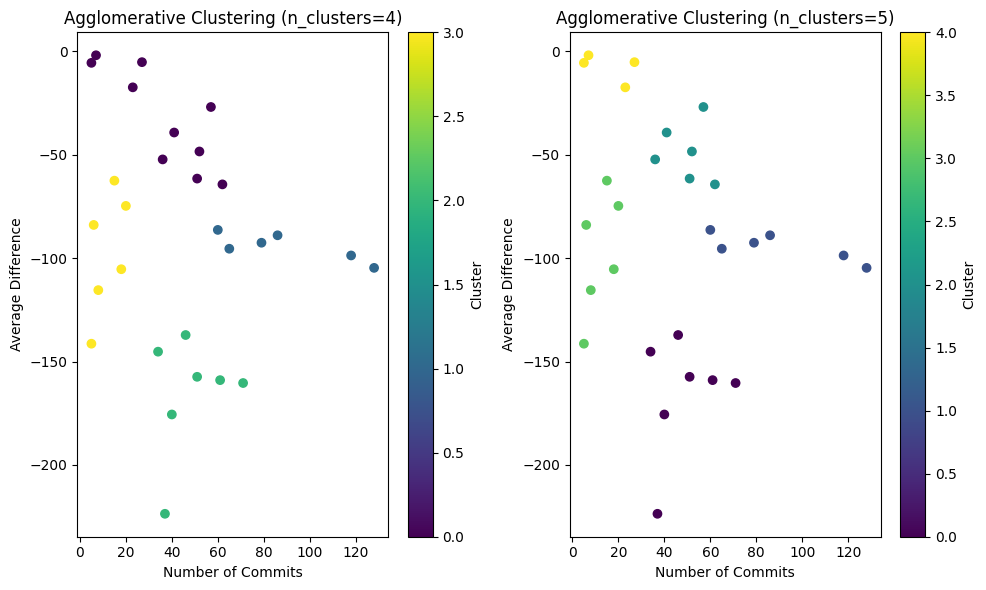

Silhouette Score for n_clusters=6: 0.4527145606287827
Silhouette Score for n_clusters=7: 0.4865808853184314


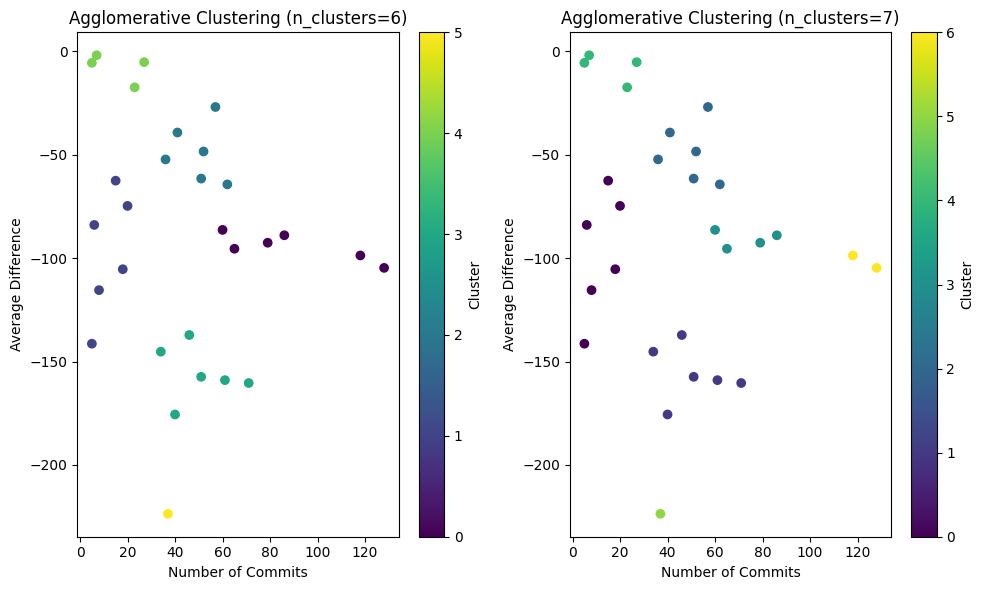

Silhouette Score for n_clusters=8: 0.50779855565622
Silhouette Score for n_clusters=9: 0.47576869039147557


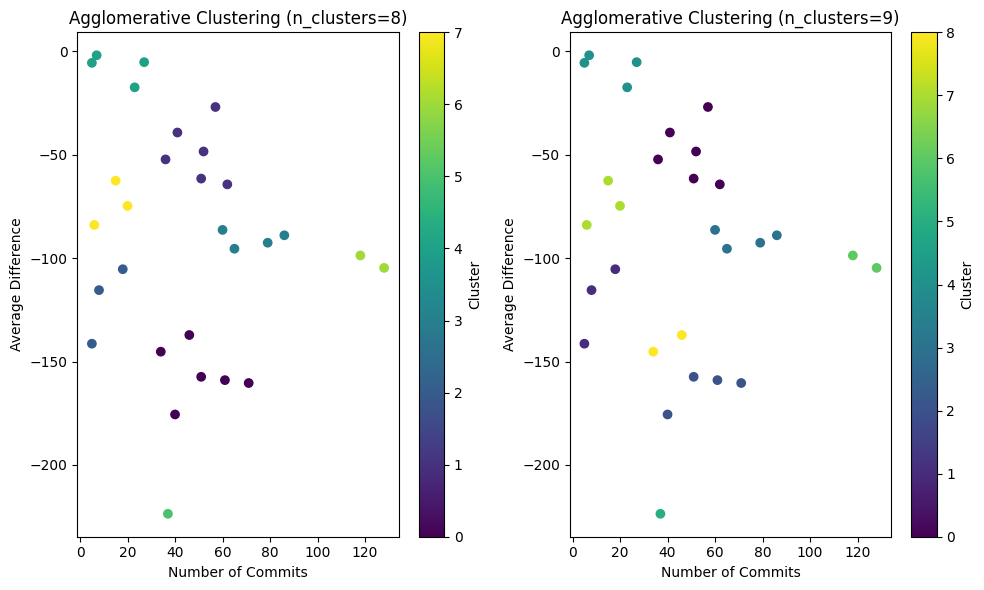

In [14]:
for n in range(4, 10, 2):
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    data['cluster'] = agg_clustering.fit_predict(data)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
    plt.title(f'Agglomerative Clustering (n_clusters={n})')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')

    silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
    print(f'Silhouette Score for n_clusters={n}: {silhouette_avg}')

    agg_clustering = AgglomerativeClustering(n_clusters=n+1)
    data['cluster'] = agg_clustering.fit_predict(data)

    plt.subplot(1, 2, 2)
    plt.scatter(data['num_commits'], data['AVG(diff)'], c=data['cluster'], cmap='viridis', marker='o')
    plt.title(f'Agglomerative Clustering (n_clusters={n+1})')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')
    silhouette_avg = silhouette_score(data[['num_commits', 'AVG(diff)']], data['cluster'])
    print(f'Silhouette Score for n_clusters={n+1}: {silhouette_avg}')
    
    plt.tight_layout()
    plt.show()

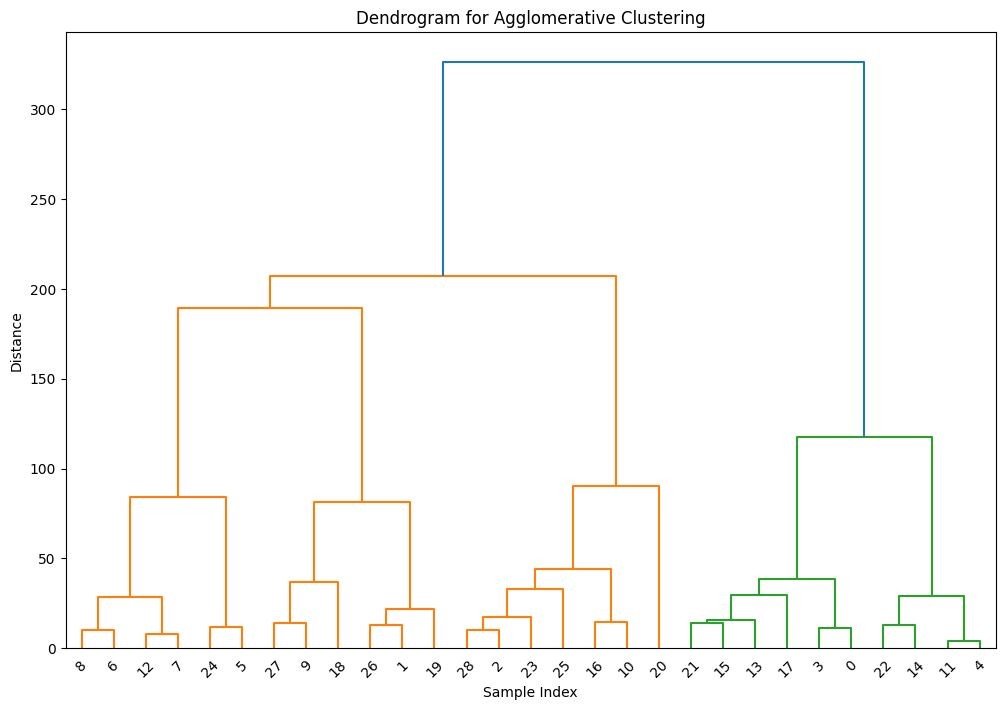

In [15]:
plt.figure(figsize=(12, 8))
linked = linkage(data[['num_commits', 'AVG(diff)']], method='ward')
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [16]:
def optimize_clustering(model_class, params, param_name, param_range, data):
    silhouette_scores = []

    for value in param_range:
        params[param_name] = value
        
        model = model_class(**params)
        labels = model.fit_predict(data)

        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
        else:
            score = -1

        silhouette_scores.append(score)

    best_index = np.argmax(silhouette_scores)
    best_param = param_range[best_index]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].plot(param_range, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score vs. Parameter Value')
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel('Silhouette Score')
    axs[0].legend()

    params[param_name] = best_param
    best_model = model_class(**params)
    best_labels = best_model.fit_predict(data)

    axs[1].scatter(data.iloc[:, 0], data.iloc[:, 1], c=best_labels, cmap='viridis', marker='o')
    axs[1].set_title(f'Clustering with Best {param_name} = {best_param}')
    axs[1].set_xlabel(data.columns[0])
    axs[1].set_ylabel(data.columns[1])
    fig.colorbar(scatter, ax=axs[1], label='Cluster')

    plt.tight_layout()
    plt.show()

    return fig, best_param

/tmp/ipykernel_2003/2407230331.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/tmp/ipykernel_2003/2407230331.py:36: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1200 with 24 Axes> than <Figure size 1400x600 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(scatter, ax=axs[1], label='Cluster')


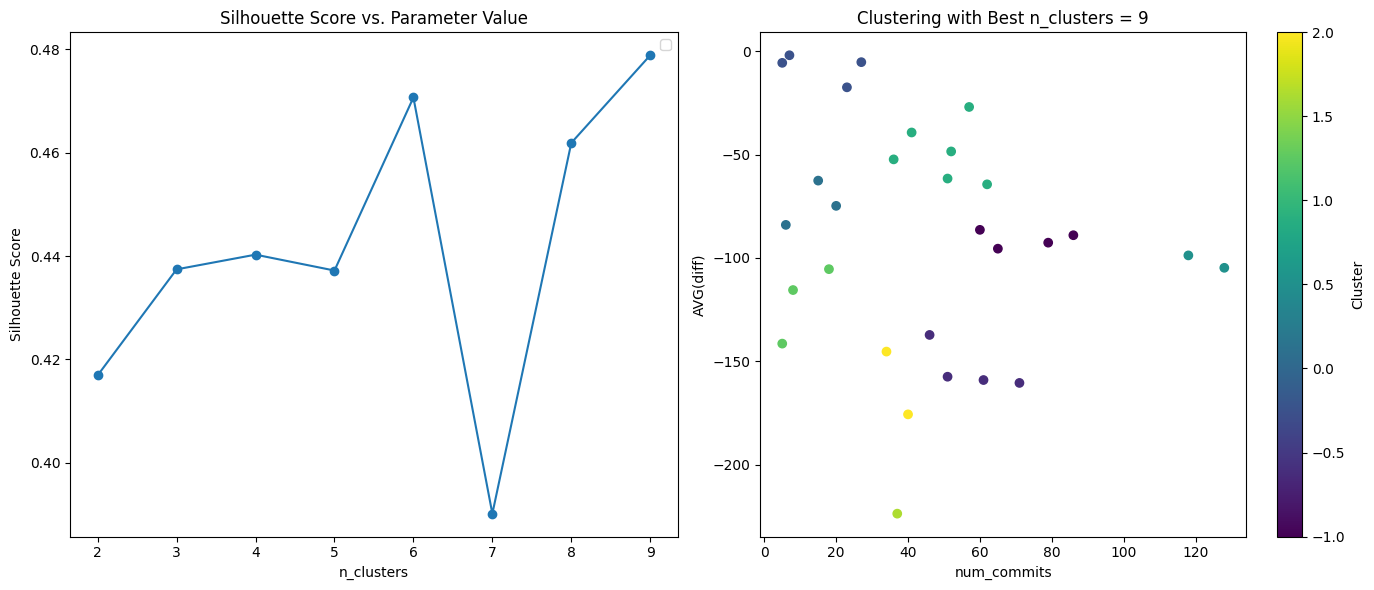

(<Figure size 1400x600 with 3 Axes>, 9)

In [17]:
params = {'n_clusters': 2}
param_range = range(2, 10)
optimize_clustering(KMeans, params, 'n_clusters', param_range, data)